In [1]:
library(tidyverse)
options(repr.plot.width=10, repr.plot.height=6)
theme_set(theme_classic())

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 504
## Week 11: Power, effect size, reproducibility

## False positive psychology

In [17]:
# fppsy <- readr::read_csv(file = "http://rpository.com/ds4psy/data/falsePosPsy_all.csv")
filter(fppsy, study == 1, !when64) %>% lm(feelold ~ dad + potato, data = .) %>% summary


Call:
lm(formula = feelold ~ dad + potato, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.07856 -0.45790 -0.05732  0.46778  1.40938 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.93189    1.51637   0.615   0.5440  
dad          0.02123    0.02796   0.759   0.4542  
potato       0.49083    0.21825   2.249   0.0329 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5763 on 27 degrees of freedom
Multiple R-squared:  0.1594,	Adjusted R-squared:  0.09709 
F-statistic: 2.559 on 2 and 27 DF,  p-value: 0.096


In [164]:
# study 1

            Df Sum Sq Mean Sq F value Pr(>F)  
dad          1  0.020  0.0201   0.060 0.8077  
cond         1  1.680  1.6797   5.058 0.0329 *
Residuals   27  8.967  0.3321                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [23]:
# study 2
fppsy %>% filter(study == 2, !when64) %>% 
    lm(aged365 ~ dad + potato, data = .) %>% summary


Call:
lm(formula = aged365 ~ dad + potato, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0015 -1.1558 -0.2234  0.7194  5.6619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  9.63921    3.77390   2.554  0.01891 * 
dad          0.23116    0.07451   3.103  0.00561 **
potato      -1.79827    0.92094  -1.953  0.06500 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.957 on 20 degrees of freedom
Multiple R-squared:  0.3365,	Adjusted R-squared:  0.2701 
F-statistic: 5.071 on 2 and 20 DF,  p-value: 0.01655


## Researcher DOF

How likely is a false positive if I can choose among several dependent variables to report?

In [44]:
sim.A <- function() {
    X <- rnorm(n = 20)
    Y <- .5 * X + sqrt(1 - .5^2) * rnorm(n = 20)
    p.values <- list(X, Y, (X + Y) / 2) %>% map_dbl(\(v) t.test(v)$p.value)
    min(p.values) < 0.05
}

replicate(sim.A(), n = 10000) %>% mean

[1] 0.1036

What if I can collect additional data?

In [59]:
sim.B <- function() {
    X <- rnorm(n = 20)
    p.values <- list(X, c(X, rnorm(n = 10))) %>% map_dbl(\(v) t.test(v)$p.value)
    min(p.values) < 0.05
}

replicate(sim.B(), n = 100000) %>% mean

[1] 0.07843

## Beauty and sex ratio at birth

In [62]:
y <- c(0.5, 0.56, 0.5, 0.53, 0.44)
x <- 1:5
df <- tibble(y = y, x = x)
lm(y ~ x, data = df) %>% summary


Call:
lm(formula = y ~ x, data = df)

Residuals:
     1      2      3      4      5 
-0.036  0.039 -0.006  0.039 -0.036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.55100    0.04560  12.084  0.00122 **
x           -0.01500    0.01375  -1.091  0.35502   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04347 on 3 degrees of freedom
Multiple R-squared:  0.2841,	Adjusted R-squared:  0.04545 
F-statistic:  1.19 on 1 and 3 DF,  p-value: 0.355


`geom_smooth()` using formula = 'y ~ x'


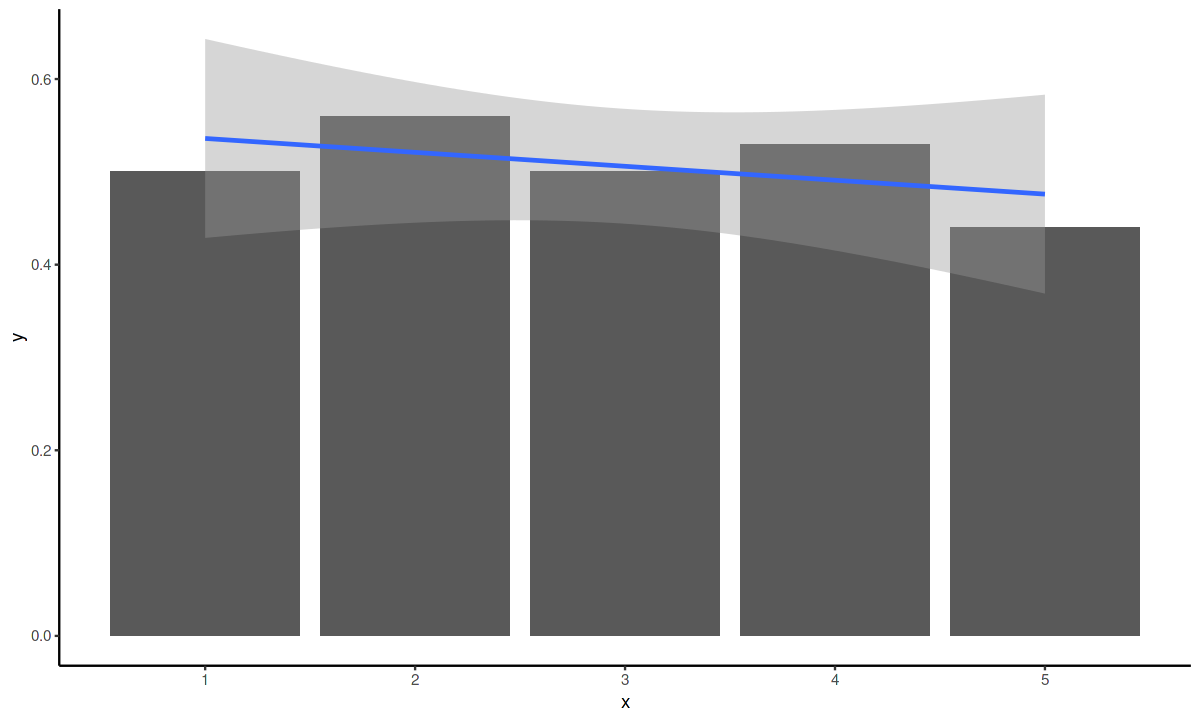

In [66]:
ggplot(df, aes(x=x, y=y)) + geom_col() + geom_smooth(method="lm")

In [67]:
library(rstanarm)

fit <- stan_glm(y ~ x,
                data = df,
                prior = normal(0, .01 / 3), # |beta| <= 0.01 with high prob
                family = gaussian())

# summary(fit)

ERROR: Error in library(rstanarm): there is no package called ‘rstanarm’


In [68]:
# library(readxl)
# download.file('http://stat.columbia.edu/~gelman/research/beautiful/beautiful%20people%20kids2.xls', 'bp.xls')
# read_excel('bp.xls')
bp <- read_csv("bp.csv") %>% print

New names:
• `` -> `...5`
• `` -> `...6`
Rows: 300 Columns: 6
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Person
dbl (3): sons, daughters, year
lgl (2): ...5, ...6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 300 × 6
   Person              sons daughters  year ...5  ...6 
   <chr>              <dbl>     <dbl> <dbl> <lgl> <lgl>
 1 Amy Brenneman          1         1  1995 NA    NA   
 2 Babyface               2         0  1995 NA    NA   
 3 Brad Pitt              0         1  1995 NA    NA   
 4 Cara Oculato          NA        NA  1995 NA    NA   
 5 Carlos Betancourt      0         0  1995 NA    NA   
 6 Chiara Mastroianni     1         1  1995 NA    NA   
 7 Claudia Schiffer       1         1  1995 NA    NA   
 8 Courteney Cox          0         1  1995 NA    NA   
 9 Debrah Farentino       0         2  1995 NA    NA   
10 Demi Moore             0         3  1995 NA    NA   
# ℹ 290 more rows


In [83]:
E.type.M <- function(mu) {
    X <- rnorm(n = 100000, mean = mu)
    sig <- abs(X) > 1.96
    X_sig <- X[sig]
    mean(abs(X_sig / mu))
}

x <- seq(0, 1, by=0.001)
E.type.M(x)

Warning message in X_sig/mu:
“longer object length is not a multiple of shorter object length”


[1] Inf

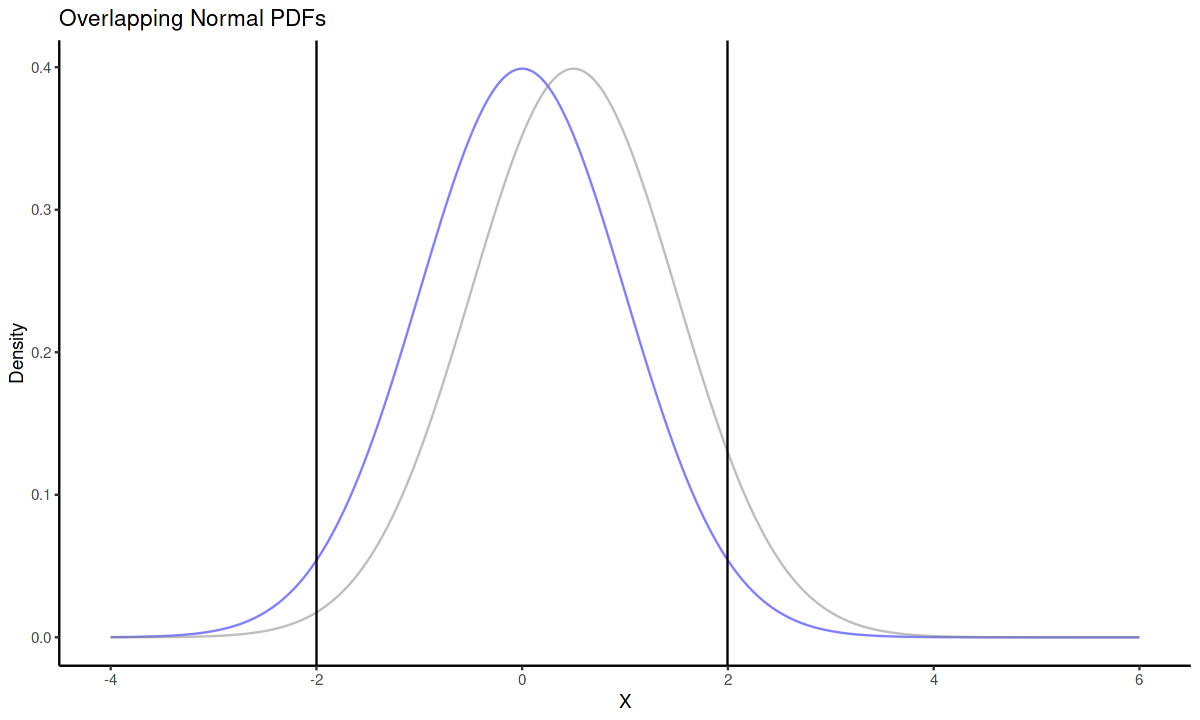

In [76]:
library(ggplot2)
library(dplyr)

# Generate data for normal PDFs
x_values <- seq(-4, 6, by = 0.01)
normal_data <- expand.grid(x = x_values, mean = c(0, .5)) %>%
  mutate(density = dnorm(x, mean = mean, sd = 1),
         color = if_else(mean == 0, "blue", "red"))

# Plot
ggplot(normal_data, aes(x = x, y = density, group = factor(mean), fill = factor(mean))) +
  geom_line(alpha = 0.5, aes(color = factor(mean))) +
  geom_vline(xintercept = c(-2, 2)) +
  scale_fill_manual(values = c("0" = "blue", "2" = "red")) +
  scale_color_manual(values = c("0" = "blue", "2" = "red")) +
  labs(title = "Overlapping Normal PDFs", x = "X", y = "Density") +
  theme_classic() +
  guides(fill = FALSE, color = FALSE) # Remove legend

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Are female hurricanes more dangerous than male hurricanes?

In [3]:
# hur.data <- "https://www.pnas.org/action/downloadSupplement?doi=10.1073%2Fpnas.1402786111&file=pnas.1402786111.sd01.xlsx"
# download.file(hur.data, "pnas.1402786111.sd01.xlsx")
# hurricane <- readxl::read_excel('pnas.1402786111.sd01.xlsx')
# write_csv(hurricane, "hurricane.csv")
hurricane <- read_csv("https://raw.githubusercontent.com/terhorst/stats504/main/lectures/week11/hurricane.csv")

Rows: 98 Columns: 14
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Year, Name, Source
dbl (11): MasFem, MinPressure_before, Minpressure_Updated 2014, Gender_MF, C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
hurricane %>% colnames 

[1] "Year"                     "Name"                    
 [3] "MasFem"                   "MinPressure_before"      
 [5] "Minpressure_Updated 2014" "Gender_MF"               
 [7] "Category"                 "alldeaths"               
 [9] "NDAM"                     "Elapsed Yrs"             
[11] "Source"                   "ZMasFem"                 
[13] "ZMinPressure_A"           "ZNDAM"

In [5]:
hurricane_data <- hurricane %>%
    # rename some variables
    rename(
        year = Year,
        name = Name,
        dam = NDAM,
        death = alldeaths,
        female = Gender_MF,
        masfem = MasFem,
        category = Category,
        pressure = `Minpressure_Updated 2014`,
    ) %>%
    # create new variables
    # which are relevant later on
    mutate(
        post = ifelse(year>1979, 1, 0),
        zcat = as.numeric(scale(category)),
        zpressure = -scale(pressure),
    )

### Reproducing the main result

In [6]:
df.filtered = hurricane_data %>% 
  filter(name != "Katrina" & name != "Audrey")

In [7]:
df.filtered %>% summarize(across(c(masfem, death, pressure, category, dam), list(mean=mean, sd=sd)))

masfem_mean,masfem_sd,death_mean,death_sd,pressure_mean,pressure_sd,category_mean,category_sd,dam_mean,dam_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.780797,3.227222,20.65217,40.90419,964.913,19.06533,2.086957,1.055099,7269.783,12934.09


In [8]:
library(MASS)

fit = glm.nb(
  death ~ masfem * dam + masfem * pressure,
  data = df.filtered,
)

summary(fit)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select





Call:
glm.nb(formula = death ~ masfem * dam + masfem * pressure, data = df.filtered, 
    init.theta = 0.7867893292, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4961  -1.0440  -0.4778   0.2650   2.6012  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      6.994e+01  1.945e+01   3.596 0.000323 ***
masfem          -5.970e+00  2.455e+00  -2.432 0.014999 *  
dam             -3.820e-05  2.852e-05  -1.339 0.180442    
pressure        -6.987e-02  2.000e-02  -3.493 0.000478 ***
masfem:dam       1.588e-05  3.636e-06   4.368 1.25e-05 ***
masfem:pressure  6.108e-03  2.527e-03   2.417 0.015643 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.7868) family taken to be 1)

    Null deviance: 180.03  on 91  degrees of freedom
Residual deviance: 102.90  on 86  degrees of freedom
AIC: 660.74

Number of Fisher Scoring iterations: 1


              Theta:  0.7

In [9]:
library(mgcv)

fit = gam(
  death ~ masfem * dam + masfem * pressure,
  data = df.filtered,
  family = "nb"
)

broom::tidy(fit, TRUE)

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.



term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),7.014482e+01,2.002977e+01,3.502028,4.617313e-04
masfem,-5.986416e+00,2.528981e+00,-2.367126,1.792683e-02
dam,-3.845306e-05,2.945549e-05,-1.305463,1.917351e-01
pressure,-7.008065e-02,2.060045e-02,-3.401899,6.691936e-04
masfem:dam,1.593219e-05,3.755669e-06,4.242169,2.213695e-05
masfem:pressure,6.123656e-03,2.603217e-03,2.352342,1.865563e-02


### What decisions did we make when fitting this model?
- Filtering: exclude female hurricanes that caused a lot of deaths.
- Choice of regression model
- Specification of regression model
- How is everything measured?

In [10]:
library(mgcv)
fit = mgcv::gam(
  death ~ pressure * masfem + pressure * dam,
  data = df.filtered,
)

broom::tidy(fit)

term
<chr>


In [11]:
fit = glm(
  death ~ pressure * masfem + pressure * dam,
  data = df.filtered,
  family = "poisson"
)

broom::tidy(fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.608494e+01,4.588775e+00,12.222204,2.365829e-34
pressure,-5.633584e-02,4.823911e-03,-11.678458,1.642479e-31
masfem,-1.496886e+00,4.899877e-01,-3.054947,2.251002e-03
dam,-1.568298e-03,9.384560e-05,-16.711473,1.081310e-62
pressure:masfem,1.632394e-03,5.156723e-04,3.165564,1.547827e-03
pressure:dam,1.693970e-06,9.960861e-08,17.006262,7.379859e-65


## A multiverse analysis
The `multiverse` package lets us systematically keep track of all the different decisions we made during the analysis.

In [50]:
library(multiverse)
M <- multiverse()
M

Multiverse

  Multiverse consists of 1 different analyses

   Parameters: 
   No parameters have been defined yet


   Conditions: 
     No conditions have been defined yet

In [51]:
inside(M, df <- hurricane_data)

In [52]:
inside(M, {
    df.filtered <- df %>% 
        filter(branch(death_outliers,
                     "no_exclusion" ~ TRUE,
                     "most_extreme" ~ name != "Katrina",
                      "two_most_extreme" ~ (name != "Katrina") & (name != "Audrey")
                     ))
})
M

Multiverse

  Multiverse consists of 3 different analyses

   Parameters: 
     Parameter name: death_outliers 
        options: no_exclusion most_extreme two_most_extreme 

   Conditions: 
     No conditions have been defined yet

In [53]:
parameters(M)

$death_outliers
$death_outliers[[1]]
[1] "no_exclusion"

$death_outliers[[2]]
[1] "most_extreme"

$death_outliers[[3]]
[1] "two_most_extreme"

In [54]:
expand(M)

.universe,death_outliers,.parameter_assignment,.code,.results,.errors
<int>,<chr>,<list>,<list>,<list>,<list>
1,no_exclusion,no_exclusion,"{, df <- hurricane_data, }, {, df.filtered <- df %>% filter(TRUE), }",<environment: 0x5609a14aac28>,"NA, NA"
2,most_extreme,most_extreme,"{, df <- hurricane_data, }, {, df.filtered <- df %>% filter(name != ""Katrina""), }",<environment: 0x5609a14983d8>,"NA, NA"
3,two_most_extreme,two_most_extreme,"{, df <- hurricane_data, }, {, df.filtered <- df %>% filter((name != ""Katrina"") & (name != , ""Audrey"")), }",<environment: 0x5609a1487fa0>,"NA, NA"


In [55]:
code(M)

$`1`
{
    df <- hurricane_data
}

$`2`
{
    df.filtered <- df %>% filter(branch(death_outliers, "no_exclusion" ~ 
        TRUE, "most_extreme" ~ name != "Katrina", "two_most_extreme" ~ 
        (name != "Katrina") & (name != "Audrey")))
}


In [56]:
inside(M, {
    fit_fun <- branch(family, 
                      "gaussian" ~ glm,
                      "poisson" ~ glm,
                      "nb" ~ mgcv::gam
                     )
    fam <- branch(family,
        "gaussian" ~ "gaussian",
        "poisson" ~ "poisson",
        "nb" ~ "nb"
    )
    df.filtered$outcome <- branch(family,
        "gaussian" ~ log1p(df.filtered$death),
        "poisson" ~ df.filtered$death,
        "nb" ~ df.filtered$death
    )
    fit <- fit_fun(outcome ~ branch(formula,
        "marginal" ~ masfem + pressure + dam,
        "2int1" ~ pressure * masfem + pressure * dam,
        "3int" ~ pressure * masfem * dam
        ),
        family = fam, data = df.filtered)
})

In [60]:
M

Multiverse

  Multiverse consists of 27 different analyses

   Parameters: 
     Parameter name: death_outliers 
        options: no_exclusion most_extreme two_most_extreme 
     Parameter name: family 
        options: gaussian poisson nb 
     Parameter name: formula 
        options: marginal 2int1 3int 

   Conditions: 
     No conditions have been defined yet

In [61]:
inside(M, {
    sf <- summary(fit)
    effect <- branch(family,
        "gaussian" ~ coefficients(sf),
        "poisson" ~ coefficients(sf),
        "nb" ~ sf$p.table
    )["masfem", 4]
})

In [62]:
execute_multiverse(M)
multiverse::expand(M) %>% extract_variables(effect)

.universe,death_outliers,family,formula,.parameter_assignment,.code,.results,.errors,effect
<int>,<chr>,<chr>,<chr>,<list>,<list>,<list>,<list>,<dbl>
1,no_exclusion,gaussian,marginal,"no_exclusion, gaussian , marginal","{, df <- hurricane_data, }, {, df.filtered <- df %>% filter(TRUE), }, {, fit_fun <- glm, fam <- ""gaussian"", df.filtered$outcome <- log1p(df.filtered$death), fit <- fit_fun(outcome ~ masfem + pressure + dam, family = fam, , data = df.filtered), }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }",<environment: 0x5609a971edb0>,"NA, NA, NA, NA, NA",6.991712e-01
2,no_exclusion,gaussian,2int1,"no_exclusion, gaussian , 2int1","{, df <- hurricane_data, }, {, df.filtered <- df %>% filter(TRUE), }, {, fit_fun <- glm, fam <- ""gaussian"", df.filtered$outcome <- log1p(df.filtered$death), fit <- fit_fun(outcome ~ pressure * masfem + pressure * dam, , family = fam, data = df.filtered), }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }",<environment: 0x5609a6a07518>,"NA, NA, NA, NA, NA",4.973535e-01
3,no_exclusion,gaussian,3int,"no_exclusion, gaussian , 3int","{, df <- hurricane_data, }, {, df.filtered <- df %>% filter(TRUE), }, {, fit_fun <- glm, fam <- ""gaussian"", df.filtered$outcome <- log1p(df.filtered$death), fit <- fit_fun(outcome ~ pressure * masfem * dam, family = fam, , data = df.filtered), }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }",<environment: 0x5609a473e5f8>,"NA, NA, NA, NA, NA",5.896454e-01
4,no_exclusion,poisson,marginal,"no_exclusion, poisson , marginal","{, df <- hurricane_data, }, {, df.filtered <- df %>% filter(TRUE), }, {, fit_fun <- glm, fam <- ""poisson"", df.filtered$outcome <- df.filtered$death, fit <- fit_fun(outcome ~ masfem + pressure + dam, family = fam, , data = df.filtered), }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }",<environment: 0x5609a30646e0>,"NA, NA, NA, NA, NA",3.660634e-25
5,no_exclusion,poisson,2int1,"no_exclusion, poisson , 2int1","{, df <- hurricane_data, }, {, df.filtered <- df %>% filter(TRUE), }, {, fit_fun <- glm, fam <- ""poisson"", df.filtered$outcome <- df.filtered$death, fit <- fit_fun(outcome ~ pressure * masfem + pressure * dam, , family = fam, data = df.filtered), }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }",<environment: 0x5609a4a8fd18>,"NA, NA, NA, NA, NA",2.251002e-03
6,no_exclusion,poisson,3int,"no_exclusion, poisson , 3int","{, df <- hurricane_data, }, {, df.filtered <- df %>% filter(TRUE), }, {, fit_fun <- glm, fam <- ""poisson"", df.filtered$outcome <- df.filtered$death, fit <- fit_fun(outcome ~ pressure * masfem * dam, family = fam, , data = df.filtered), }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }, {, sf <- summary(fit), effect <- coefficients(sf)[""masfem"", 4], }",<environment: 0x5609a5ab7a00>,"NA, NA, NA, NA, NA",4.709140e-02
7,no_exclusion,nb,marginal,"no_exclusion, nb , marginal","{, df <- hurricane_data, }, {, df.filtered <- df %>% filter(TRUE), }, {, fit_fun <- mgcv::gam, fam <- ""nb"", df.filtered$outcome <- df.filtered$death, fit <- fit_fun(outcome ~ masfem + pressure + dam, family = fam, , data = df.filtered), }, {, sf <- summary(fit), effect <- sf$p.table[""masfem"", 4], }, {, sf <- summary(fit), effect <- sf$p.table[""masfem"", 4], }",<environment: 0x5609a6a74218>,"NA, NA, NA, NA, NA",3.969918e-01
8,no_exclusion,nb,2int1,"no_exclusion, nb , 2int1","{, df <- hurricane_data, }, {, df.filtered <- df %>% filter(TRUE), }, {, fit_fun <- mgcv::gam, fam <- ""nb"", df.filtered$outcome <- df.filtered$death, fit <- fit_fun(outcome ~ pressure * masfem + pressure * dam, , fam

## The specification curve
The [specification curve](https://urisohn.com/sohn_files/wp/wordpress/wp-content/uploads/Paper-Specification-curve-2018-11-02.pdf) is a visualization of all the different types results that could have been obtained from a multiverse analysis.

In [56]:
# install.packages("specr")
library(specr)

pois <- function(formula, data) {
  glm(formula, data, family = poisson())
}

nb <- function(formula, data) {
  mgcv::gam(formula, data, family = "nb") 
}

hurricane_data <- hurricane_data %>% mutate(
    extreme1 = name != "Katrina",
    extreme2 = !(name %in% c("Katrina", "Audrey"))
)

specs <- setup(data = hurricane_data,
               x = c("masfem"),
               y = c("death"),
               controls = c("dam", "pressure", "dam:pressure"),
               model = c("lm", "pois"),
               subsets = list(extreme1=c(T), extreme2=c(T))
)

# Summary of specifications
summary(specs)

Setup for the Specification Curve Analysis
-------------------------------------------
Class:                      specr.setup -- version: 1.0.1 
Number of specifications:   64 

Specifications:

  Independent variable:     masfem 
  Dependent variable:       death 
  Models:                   lm, pois 
  Covariates:               no covariates, dam, pressure, dam:pressure, dam + pressure, dam + dam:pressure, pressure + dam:pressure, dam + pressure + dam:pressure 
  Subsets analyses:         TRUE & TRUE, TRUE, all 

Function used to extract parameters:

  function (x) 
broom::tidy(x, conf.int = TRUE)
<environment: 0x55a5aefffba0>


Head of specifications table (first 6 rows):



x,y,model,controls,subsets,extreme1,extreme2,formula
<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<glue>
masfem,death,lm,no covariates,TRUE & TRUE,TRUE,TRUE,death ~ masfem + 1
masfem,death,lm,no covariates,TRUE,NA,TRUE,death ~ masfem + 1
masfem,death,lm,no covariates,TRUE,TRUE,NA,death ~ masfem + 1
masfem,death,lm,no covariates,all,NA,NA,death ~ masfem + 1
masfem,death,lm,dam,TRUE & TRUE,TRUE,TRUE,death ~ masfem + dam
masfem,death,lm,dam,TRUE,NA,TRUE,death ~ masfem + dam


In [57]:
results <- specr(specs)

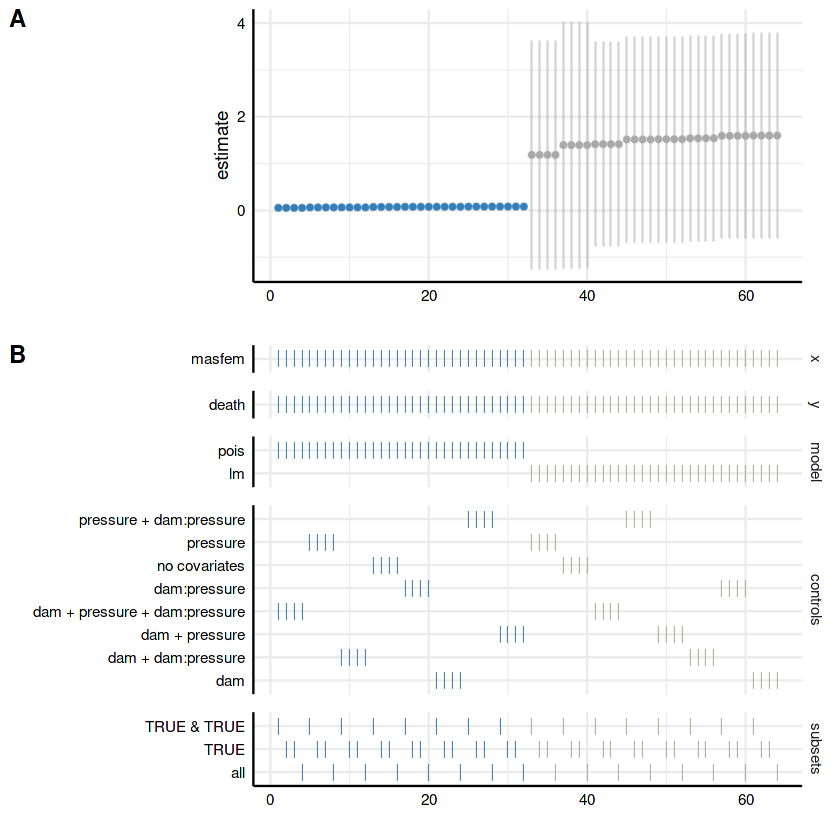

In [58]:
plot(results)